In [1]:
#----TURN THESE ON IF RUNNING ON OWN INSTALLATION (default turned-on)

import sys
sys.path[0:0] = ['../..' , '../../3rdparty',
                 
                 '../../..' , '../../../3rdparty',
                 
                 '../../../..' , '../../../../3rdparty',
                 
                 ] # Put these at the head of the search path

#---- THESE ARE THE COMMON IMPORTS, WHICHEVER ROUTE YOU TOOK ABOVE

from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import *
from jove.AnimateNFA import *
from jove.Def_PDA    import *
from collections     import defaultdict
from random          import seed
from random          import randint

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accept

In [2]:
# state  0  1
#     0  0  1
#     1  2  3
#     2  4  0
#     3  1  2
#     4  3  4

DfaMsbMod5 = md2mc('''DFA
IF : 0 -> IF
IF : 1 -> S1
S1 : 0 -> S2
S1 : 1 -> S3
S2 : 0 -> S4
S2 : 1 -> IF
S3 : 0 -> S1
S3 : 1 -> S2
S4 : 0 -> S3
S4 : 1 -> S4
''')

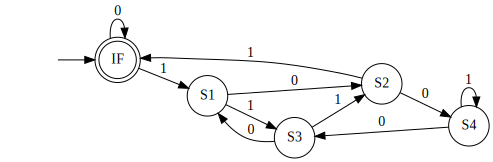

In [3]:
dotObj_dfa(DfaMsbMod5)

In [4]:
# State  0  1
#     0  0  2
#     1  3  0
#     2  1  3
#     3  4  1
#     4  2  4

DfaLsbMod5 = md2mc('''DFA
IFRem0 : 0 -> IFRem0
IFRem0 : 1 -> SRem2
SRem2  : 0 -> SRem1
SRem2  : 1 -> SRem3
SRem1  : 0 -> SRem3
SRem1  : 1 -> IFRem0
SRem3  : 0 -> SRem4
SRem3  : 1 -> SRem1
SRem4  : 0 -> SRem2
SRem4  : 1 -> SRem4
''')

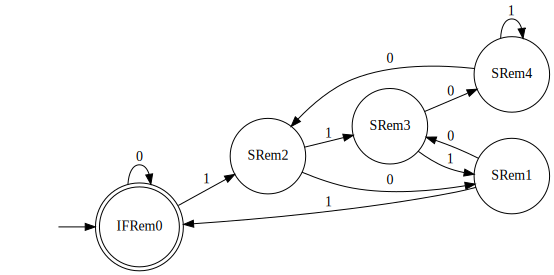

In [5]:
dotObj_dfa(DfaLsbMod5)

In [6]:
# Testing suite helper functions

def get_reversed_bits(num):
    binary_rep = bin(num)
    reverse = binary_rep[-1:1:-1]
    
    return reverse
    
def get_bits(num):
    return bin(num)[2:]

def convert_to_decimal(binary_rep):
    return int(binary_rep, 2)

def generate_mults_of_five(upto):
    i = 0
    mults = list()
    
    while i <= upto:
        mults.append(i)
        i += 5
    
    return mults

def get_lots_of_onegtzero(limit_count, limit_strlen):
    i = 0
    onegtzero_list = list()
    seed(1)
    
    while i < limit_count:
        string_to_append = ''
        
        for j in range(0, limit_strlen):
            string_to_append += str(randint(0, 1))
        
        onegtzero_list.append(string_to_append)
        
        i += 1
        
    
    return onegtzero_list

In [7]:
# Testing suite

mults = generate_mults_of_five(300)
test_strings = defaultdict(bool)

for mult in mults:
    conv_bits = get_bits(mult)
    rev_conv_bits = get_reversed_bits(mult)
    rev_conv_dec = convert_to_decimal(rev_conv_bits)
    
    if rev_conv_dec % 5 != 0:
        test_strings[str(conv_bits)] = False
    else:
        test_strings[str(conv_bits)] = True

for s in test_strings.keys():
    accepts_str = str(accepts_dfa(DfaLsbMod5, s))
    expected_str = str(test_strings[s])
    
    print('string is ' + s)
    print('\tresult is ' + accepts_str)
    
    if (accepts_str != expected_str):
        print('\tuh oh! bad result. accepts is ' + \
              accepts_str + ' and expected is ' + \
              expected_str)
    else:
        print('\taccepts and expected match')

string is 0
	result is True
	accepts and expected match
string is 101
	result is True
	accepts and expected match
string is 1010
	result is True
	accepts and expected match
string is 1111
	result is True
	accepts and expected match
string is 10100
	result is True
	accepts and expected match
string is 11001
	result is False
	accepts and expected match
string is 11110
	result is True
	accepts and expected match
string is 100011
	result is False
	accepts and expected match
string is 101000
	result is True
	accepts and expected match
string is 101101
	result is True
	accepts and expected match
string is 110010
	result is False
	accepts and expected match
string is 110111
	result is False
	accepts and expected match
string is 111100
	result is True
	accepts and expected match
string is 1000001
	result is True
	accepts and expected match
string is 1000110
	result is False
	accepts and expected match
string is 1001011
	result is True
	accepts and expected match
string is 1010000
	result is Tr

In [8]:
Pda1Gt0 = md2mc('''PDA
I : '', '';  A -> W
W : '', A;  BA -> W
W : '', A;  1A -> W
W : '', A;  1B -> W
W : '', B;  BB -> W
W : '', B; 0B1 -> W
W : '', B; 1B0 -> W
W : '', B;  '' -> W
W : '', #;   # -> F
W : 1, 1; '' | 0, 0; '' -> W
''')

In [9]:
# Testing suite

onegtzero_list = get_lots_of_onegtzero(20, 5)

for onegtzero in onegtzero_list:
    explore_pda(onegtzero, Pda1Gt0)

String 00101 rejected by your PDA :-(
Visited states are:
{('W', '00101', '0B1A#'), ('W', '0101', 'B1A#'), ('W', '1', '0B1B11BA#'), ('W', '1', '0B1B1B1A#'), ('W', '1', '1011A#'), ('W', '', 'BB011BA#'), ('W', '101', 'BBB1BB1A#'), ('W', '101', '0B111BBA#'), ('W', '01', 'B1A#'), ('W', '00101', 'BA#'), ('W', '1', '1B0B11A#'), ('W', '01', '1B0B1A#'), ('W', '', 'BBB1A#'), ('W', '', 'B0BB11A#'), ('W', '101', '11BA#'), ('W', '', 'B1A#'), ('W', '1', '0B11B1BA#'), ('W', '1', '0B1BB11A#'), ('W', '0101', 'B1BA#'), ('W', '00101', '1B#'), ('W', '01', 'B0BB11A#'), ('W', '101', '0B11B1BA#'), ('W', '', '01BB1A#'), ('W', '', 'BB0B11A#'), ('W', '0101', 'BBB1A#'), ('W', '00101', 'BBBA#'), ('W', '1', '1B0BB11A#'), ('W', '0101', '1BA#'), ('W', '1', 'BBBBB11A#'), ('W', '', 'B011BA#'), ('W', '', '1B0B1A#'), ('W', '01', '011BBA#'), ('W', '101', '1B0BB11A#'), ('W', '101', '0B11BB1A#'), ('W', '1', 'B11BA#'), ('W', '101', '1B1A#'), ('W', '0101', 'BB1BBA#'), ('W', '01', '0BB11A#'), ('W', '101', 'BBBBB11A#'), ('W',

String 01001 rejected by your PDA :-(
Visited states are:
{('W', '01001', '1B#'), ('W', '', 'B01101A#'), ('W', '1001', '1B01BBA#'), ('W', '1', '0B1B11BA#'), ('W', '1', '0B1B1B1A#'), ('W', '001', '0B1BA#'), ('W', '', 'BB011BA#'), ('W', '01', 'B1A#'), ('W', '1', '1B0B11A#'), ('W', '', '011BBA#'), ('W', '', 'BBB1A#'), ('W', '01', '1B0B1A#'), ('W', '', 'B0BB11A#'), ('W', '', 'B1A#'), ('W', '1', '0B11B1BA#'), ('W', '01001', 'BBBA#'), ('W', '1', '0B1BB11A#'), ('W', '01001', '0B1A#'), ('W', '', '01BB1A#'), ('W', '', '01101A#'), ('W', '01', 'BBB1BBA#'), ('W', '', 'BB0B11A#'), ('W', '1', 'B11BBA#'), ('W', '01001', 'BA#'), ('W', '01001', 'BBA#'), ('W', '1', '1B0BB11A#'), ('W', '1', 'BBBBB11A#'), ('W', '', '1B0B1A#'), ('W', '', 'B011BA#'), ('W', '1', 'B11BA#'), ('W', '001', 'B01BBA#'), ('W', '01001', '0B1BBA#'), ('W', '1', 'BBB1B1A#'), ('W', '01001', '1B0BBA#'), ('W', '1', 'BB1B1A#'), ('W', '', '0B1011A#'), ('W', '1001', 'BBB1BBA#'), ('W', '1', 'BB11BBA#'), ('W', '001', '1B0A#'), ('W', '1', '1B01

String 10100 rejected by your PDA :-(
Visited states are:
{('W', '100', 'BB10A#'), ('W', '100', '1B0B1A#'), ('W', '', 'BBB1B1#'), ('W', '0', '0B11B#'), ('W', '0', 'BBB1A#'), ('W', '', 'B1A#'), ('W', '0', '0B11A#'), ('W', '00', 'BB#'), ('W', '0100', '0B1BB#'), ('W', '00', '01BB#'), ('W', '100', '1B0BBA#'), ('W', '', 'BB1BBA#'), ('W', '0100', 'BBBB#'), ('W', '', '1B0BB11#'), ('W', '10100', 'BBBBA#'), ('W', '0', '0B11#'), ('W', '00', '01BA#'), ('W', '100', 'BBA#'), ('W', '', '1B0B1A#'), ('W', '0', '1B0A#'), ('W', '100', '1B0A#'), ('W', '100', 'BBB1B#'), ('W', '100', 'BBB1BA#'), ('W', '100', 'B1A#'), ('W', '', '1B01BBA#'), ('W', '0', '1B0BBA#'), ('W', '00', 'BB0BA#'), ('W', '0', '1BB#'), ('W', '00', 'BBBBA#'), ('W', '00', '0B1B#'), ('W', '100', '1BB#'), ('W', '00', 'B0BBA#'), ('W', '0', 'B1#'), ('W', '0', 'BBB1B#'), ('W', '', '1B01BA#'), ('W', '0', '0B1A#'), ('W', '0', 'BBBB1#'), ('W', '100', '1B01B#'), ('W', '0', '1BA#'), ('W', '100', 'B1B#'), ('W', '0', 'BBA#'), ('W', '100', '1B010A#'), 

In [10]:
help(explore_pda)

Help on function explore_pda in module jove.Def_PDA:

explore_pda(inp, P, acceptance='ACCEPT_F', STKMAX=6, chatty=False)
    A handy routine to print the result of run_pda plus making 
    future extensions to explore run-results.

